In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LP5/datasets/boston_housing.csv")

In [ ]:
# Split into features and target
X = df.drop("MEDV", axis=1).values
y = df["MEDV"].values

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [ ]:
# Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    x_train_scaled, y_train,
    batch_size=32,
    epochs=500,
    validation_data=(x_test_scaled, y_test),
    callbacks=[early_stop],
    verbose=0
)

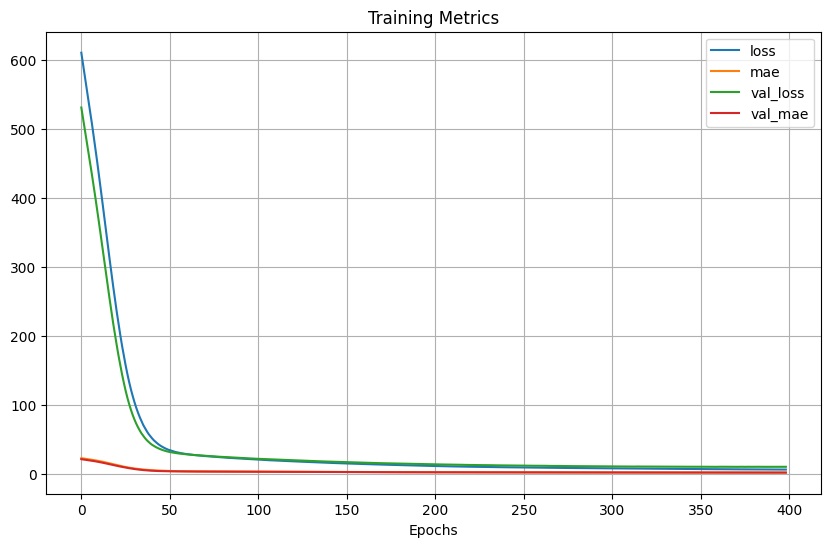

In [ ]:
# Plot training history
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.title("Training Metrics")
plt.xlabel("Epochs")
plt.grid(True)
plt.show()

In [ ]:
# Make predictions
y_pred = model.predict(x_test_scaled).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
# Plot regression
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
# Evaluation
def regression_metrics_display(y_true, y_pred):
    print(f"MAE: {metrics.mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {metrics.mean_squared_error(y_true, y_pred):.2f}")
    print(f"R² Score: {metrics.r2_score(y_true, y_pred):.2f}")

regression_metrics_display(y_test, y_pred)

MAE: 2.16
MSE: 10.37
R² Score: 0.86


**MAE (Mean Absolute Error): 2.16**

- This means that, on average, your model's predictions differ from the actual house prices by $2,160 (since the target is in $1000s).

- A lower MAE indicates better accuracy and more consistent predictions.

**MSE (Mean Squared Error): 10.37**

- This metric penalizes larger errors more heavily than MAE.

- A value of 10.37 means the average of squared differences between predicted and actual prices is low, indicating that your model isn’t making large mistakes often.

**R² Score (Coefficient of Determination): 0.86**

- R² measures how well the model explains the variability in the data.

- A score of 0.86 means 86% of the variation in house prices is explained by your model.

- This is a strong indicator of a good fit, especially for a basic neural network.

**How to Explain the Model to Examiner**

- Architecture:
"I used a deep neural network with one hidden layer of 32 neurons (ReLU activation) and one output layer for regression."

- Why use a hidden layer?
"While it's a linear regression task, the hidden layer allows the model to capture non-linear relationships in the data, improving performance without making the model too complex."

- EarlyStopping:
"I added EarlyStopping to avoid overfitting. It stops training if the validation loss doesn’t improve for 20 epochs and restores the best weights."

- Performance Justification:
"The high R² and low MAE/MSE suggest that the model learned the relationships between features and price well and generalizes effectively to new data."